## CMSC 197 (Machine Learning)
<p>"Assignment 3 - Implementing Linear Regression with Gradient Descent as Optimization Function"</p>
<p>by Hismaña, Nikko Gabriel (2009-48594)</p>

#### General Form of Multiple Linear Regression
<i>h_theta(x) = theta_0 + (theta_1 * x_1) + (theta_2 * x_2) ... + (theta_n * x_n) = theta.T * x</i>

<li>where: x_1, x_2, ..., x_n are the model predictors
<li>where: theta_0, theta_1, ..., theta_n are the weights associated to each predictor<p>

<p>We can represent the model as a matrix equation:
<p><i>(theta.T * x)</i>

#### Gradient Descent Common Cost Function
<i>J(theta) = (1/2m) * sum(h_theta(x^(i)) - y^(i))^2</i>
<li>where: h_theta(x^(i)) = y_hat^(i) represents the predictions made by the model
<li>where: m is the number of training examples
<li>where: x^(i) is the i-th training example
<li>where: y^(i) is the i-th training example's output


#### Formula on updating all the parameters/weights in the model
To repeat until convergence {<p>
    <i>theta_j := theta_j - alpha * (1/m) * sum(h_theta(y_hat^(i)) - y^(i)) * x_j^(i)</i>
    <p>
} simultaneously update theta_j for all j

<li>where: theta_j -  j-th parameter/weight assoc'd to predictor
<li>where: alpha -  learning rate
<li>where: y_hat^(i) -  predicted y
<li>where: y^(i) - actual y
<li>where: x_j^(i) - data points
<li>where: m - number of samples

## 0. Import Libraries

In [1]:
### standard libraries (allowed as per instructions)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### sklearn libraries 
# sklearn for preprocessing data (standardization, splitting data)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# sklearn for checking MSE and r2 vals:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# sklearn for comparison of implementation from scratch and the OLS results since sklearn uses LS for linear regression:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

## 1. Load Dataset

In [2]:
# BUGFIX: need to chdir since relative path was not working
# comment out if running on local machine
import os
os.chdir('C:/Users/asus/ML_Repos/Activities/hw3')

# load Advertising.csv using pandas
data = pd.read_csv("Advertising.csv", index_col=0)
print("Dataset:")
data.head()

Dataset:


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# print predictors
print("Predictors/Features:")
print(list(data.columns)[:-1])

# print response
print("Response:")
print(data.columns[-1])

Predictors/Features:
['TV', 'Radio', 'Newspaper']
Response:
Sales


## 2. Standardize each column of the dataset

For each predictor x_j, for all j, compute for the sntandadized values:

x_scaled = (x_j - mean(x)) / std(x)<p>
y_scaled = (y_j - mean(y)) / std(y)

ensures that the data is centered around zero, and that SD is always 1.

In [4]:
# create new dataframe for standardization
data_standardized = data.copy()
data_standardized.head()
scaler = StandardScaler()

# standardize all columns using sklearn StandardScaler:
cols = data_standardized.columns[:] # all columns including response
data_standardized[cols] = scaler.fit_transform(data_standardized[cols])

# print top 5 rows of standardized data to check
data_standardized.head()

,TV,Radio,Newspaper,Sales
1,0.969852,0.981522,1.778945,1.552053
2,-1.197376,1.082808,0.669579,-0.696046
3,-1.516155,1.528463,1.783549,-0.907406
4,0.052050,1.217855,1.286405,0.860330
5,0.394182,-0.841614,1.281802,-0.215683


In [5]:
# check shape of standardized data (TV, radio, sales)
data_standardized.shape #should be (200, 4)

(200, 4)

## 3. Add extra colmn of 1s to X

In [6]:
# add column of ones to first column of standardized data
# BUGFIX: use if condition to prevent inserting when Ones column already exists
if 'Bias' not in data_standardized.columns:
    data_standardized.insert(0, 'Bias', 1)

print(data_standardized.head())
print("Size of standardized data:", data_standardized.shape) #should be (200,5) including add'l column for bias

   Bias        TV     Radio  Newspaper     Sales
1     1  0.969852  0.981522   1.778945  1.552053
2     1 -1.197376  1.082808   0.669579 -0.696046
3     1 -1.516155  1.528463   1.783549 -0.907406
4     1  0.052050  1.217855   1.286405  0.860330
5     1  0.394182 -0.841614   1.281802 -0.215683
Size of standardized data: (200, 5)


## 4. Divide Dataset into training and testing sets (75:25)

In [7]:
### DATAFRAMES
# create x and y dataframes
x = data_standardized.drop('Sales', axis=1)
y = data_standardized["Sales"] # all rows of Sales column

### SPLITTING DATA
# split data into training and testing sets 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #using random_state 42 for reproducibility (same used in lecture code)

# print shapes of training and testing sets to check 75/25 split
# correct splitting for a sample of 200 at 75:25 testing, training is:
# 150 training (75%), 50 testing (25%)
print("x_train shape:", x_train.shape)
print(x_train.head())
print("\nx_test shape:", x_test.shape)
print(x_test.head())
print("\ny_train shape:", y_train.shape)
print(y_train.head())
print("\ny_test shape:", y_test.shape)
print(y_test.head())

#save Bias column, to be used for functions in part 5
bias = x['Bias']
bias_test = x_test['Bias']
bias_train = x_train['Bias']

x_train shape: (150, 4)
     Bias        TV     Radio  Newspaper
115     1 -0.803865  1.589235   0.181642
174     1  0.249389 -1.091451  -0.817249
6       1 -1.615408  1.731034   2.045930
127     1 -1.625918  1.055798   0.922754
118     1 -0.824884 -1.516849  -0.725185

x_test shape: (50, 4)
     Bias        TV     Radio  Newspaper
96      1  0.189837  0.562876   1.028627
16      1  0.564665  1.650006   1.028627
31      1  1.703160  0.340049   0.582118
159     1 -1.580378  0.920751   0.674182
129     1  0.855419  1.737786  -1.259154

y_train shape: (150,)
115    0.110964
174   -0.446257
6     -1.310911
127   -1.426198
118   -0.888191
Name: Sales, dtype: float64

y_test shape: (50,)
96     0.552898
16     1.609697
31     1.417551
159   -1.291696
129    2.051631
Name: Sales, dtype: float64


## 5. Fit the model on the training set.

### 5.1 Initialize_weights function
<li>Returns a vector init_w composing of 4 uniformly distributed numbers between 0 and 1.
<li>This serves as the initial weights theta_j, for j = 0,1,2,3.
<li>You can set a random seed so you can objectively assess if your model is working correctly.
<li>Seed function is used to save the state of a random function, so that it generate same random numbers on multiple execs.
<p>
<li><i>ALTERNATIVELY</i>: you can just set init_w = np.array([0.0, 0.0, 0.0, 0.0])
<li><i>NOTE</i>: the first weight refers to the weight of the bias and the rest represents the weights of the predictors (i.e. TV, radio, newspaper)

In [8]:
# create a function initialize_weights() that returns a vector init_w with 4 elements uniformly distributed between 0 and 1

def initialize_weights(random_seed):
    #use .randomState(random_seed) for reproducibility
    #use .uniform() to generate random numbers between 0 and 1, size=4
    init_w = np.random.RandomState(random_seed).uniform(0,1,4)
    return init_w

#use random seed 42 for reproducibility (can be changed to any other number)
random_seed = 42 # you can change this to any other number, currently default
# save initial weights to init_w
init_w = initialize_weights(random_seed)

print("Initialized weights:", init_w) 

#ALTERNATIVE init_w = np.array[0.0, 0.0, 0.0, 0.0]
def initialize_weights_zeros():
    #use np.zeros() to initialize weights to 0
    init_w_zeros = np.zeros(4)
    return init_w_zeros
# save initial weights zeroes to init_w_zeros
init_w_zeros = initialize_weights_zeros()

print("Initialized weights:", init_w_zeros)


Initialized weights: [0.37454012 0.95071431 0.73199394 0.59865848]
Initialized weights: [0. 0. 0. 0.]


### 5.2 Predict function
<li> Returns a vector of the predicted values y_hat^(i)

In [9]:
def predict(init_w, x):
    # use np.sum and np.multipy to calculate the dot product of init_w and x and sum the result
    return np.sum(np.multiply(init_w, x), axis = 1) #axis=1 to sum across columns


### 5.3 Compute_cost function
<li> Returns a scalar value that tells us how accurate the model is. Represented by the formula:<p>
<i>J(theta) = (1/2m) * sum(h_theta(x^(i)) - y^(i))^2</i>

In [10]:
# using the formula above (as specified in hw3), we define the function:
def compute_cost(y_hat, y):
    m = len(y)
    error = y_hat - y
    cost = (1/(2*m)) * (np.sum(np.square(error)))
    return cost


### 5.4 compute_gradient function
<li> returns a matrix w that represents the partial derivative of cost function J(theta_0, theta_1) with respect to each parameter theta_j
<p><i>(1/m) * sum(h_theta(y_hat^(i)) - y^(i)) * x_j^(i)</i>
<li>Note: we have 3 predictors and 1 bias, so w should have 4x1 shape

In [11]:
# using the given formula above, we create the compute_gradient function:
def compute_gradient(y_hat, y, x):
    m = len(y)
    error = y_hat - y
    gradient = (1/m) * np.dot(error, x)
    return gradient


### 5.5 update_weights function
<li>Returns a 4x1 matrix that contains the updated weights<p>
<p><i>theta_j := theta_j - alpha * w * x_j^(i)</i><p>
<li>where the matrix w contains the gradients for a specific iteration

In [12]:
def update_weights(init_w, gradient_w, alpha):
    updated_weights = []
    for i in range(len(init_w)):
        #init_w[i] = theta_j in formula
        #w[i] = w in formula
        updated_weights.append(init_w[i] - alpha * gradient_w[i])
    return updated_weights #returns a 4x1 matrix


### 5.6 grad_descent function
<li>returns 2 matrices: one matrix for weights, one matrix for cost values per iteration
<li>grad_descent calls the 5 previous functions

In [13]:
# grad_descent function returns 2 matrices: matrix for weights, matrix for cost values per iteration, and matrix for bias values per iteration

def grad_descent(init_w, x, y, alpha, iterations):
    #input:
    #bias = from the Bias column in x
    #x = from x_train
    #y = from y_train
    #alpha = learning rate (also used in update_weights function)
    #iterations = number of iterations

    #initialize weights using initialize_weights_zeros() function
    #can be changed to initialize_weights() function for random weights
    init_w = initialize_weights_zeros()
    #initialize cost values to empty list
    cost = 0
    #initialize cost values per iteration
    cost_values_per_iteration = []
    #initialize weights per iteration
    weights = []
    #iterate for number of iterations
    for i in range(iterations):
        #predict y_hat
        y_predicted = predict(init_w, x)
        #compute cost
        cost = compute_cost(y_predicted, y)
        #compute gradient
        gradient_w = compute_gradient(y_predicted, y, x)
        #update weights
        init_w = update_weights(init_w, gradient_w, alpha)
        #append cost values to cost_values
        cost_values_per_iteration.append(cost)
        #append weights to weights
        weights.append(init_w)
    #output: matrices of weights and cost values per iteration
    return weights, cost_values_per_iteration


### CHECKPOINT: Values for alpha and iterations

In [14]:
alpha = 0.01
iterations = 1000

### 5.7 plot_costs
<li> plot the costs as a function of iteration

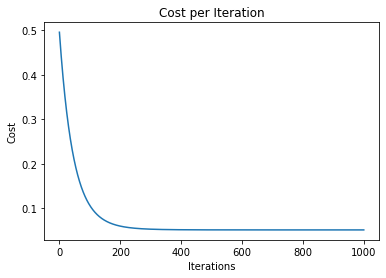

In [15]:
# plot_costs function plots the cost values per iteration
# plot_costs calls: grad_descent

def plot_costs(x, y, alpha, iterations):
    #input:
    #x = from x_train
    #y = from y_train
    #alpha = learning rate (also used in update_weights function)
    #iterations = number of iterations

    #get the cost_values_per_iteration by calling grad_descent function, specifying [1] since we only want the cost values
    cost_values_per_iteration = grad_descent(init_w, x, y, alpha, iterations)[1]
    #plot cost values per iteration
    plt.plot(cost_values_per_iteration)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost per Iteration")
    plt.show()

# call plot_costs function with the train data as an example
plot_costs(x_train, y_train, alpha, iterations)


### 5.8 predict y for train set and calculate the cost

In [16]:
# predict y for train set and calculate the cost
# use init_w_zeros from initialize_weights_zeros function
predict_y_train = predict(init_w_zeros, x_train)
#save predict_y_train as a dataframe
predict_y_train = pd.DataFrame(predict_y_train)
#set column name to "Predicted"
predict_y_train.columns = ["Predicted Y Train"]

#calculate cost for train set
y_hat_train = predict(init_w_zeros, x_train)
cost_train = compute_cost(y_hat_train, y_train)
print("Cost for TRAIN set:", cost_train)

Cost for TRAIN set: 0.49583149407395044


### 5.9 predict y for test set and calculate the cost

In [17]:
# predict y for test set and calculate the cost
# use init_w_zeros from initialize_weights_zeros function
predict_y_test = predict(init_w_zeros, x_test)
#save predict_y_train as a dataframe
predict_y_test = pd.DataFrame(predict_y_test)
#set column name to "Predicted"
predict_y_test.columns = ["Predicted Y Test"]

#calculate cost for TEST set
y_hat_test = predict(init_w_zeros, x_test)
cost_test = compute_cost(y_hat_test, y_test)
print("Cost for TEST set:", cost_test)


Cost for TEST set: 0.5125055177781486


## 6. Predict the quantitative response y on the TRAIN set
<li>Evaluate performance
<li>You can use the MSE cost function defined for the gradient descent

In [18]:
# get weights using grad_descent function for TRAIN set only
weights_train = grad_descent(init_w_zeros, x_train, y_train, alpha, iterations)[0] #[0] is for weights, [1] is for cost values per iteration

# fit the final weights to the train set using predict function
y_hat_predicted_train = predict(weights_train[-1], x_train) #weights[-1] is the last set of weights in the weights matrix

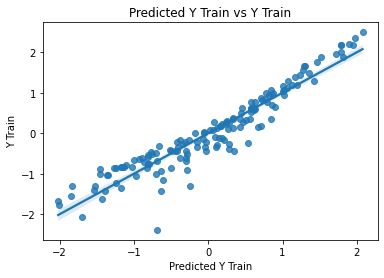

In [19]:
# add predicted y to TRAIN set as a column
x_train["Predicted Y Train"] = y_hat_predicted_train

# add y_train to TEST set as a column
x_train["Y Train"] = y_train

#plot predicted y vs actual y for train set with regression line, for y use "Sales" column from y_train
sns.regplot(x="Predicted Y Train", y=x_train["Y Train"], data=x_train)
plt.title("Predicted Y Train vs Y Train")
plt.show()

# remove "Y Test" and "Predicted Y Test" columns from x_train
x_train = x_train.drop(["Y Train", "Predicted Y Train"], axis=1)


#### Evaluate Performance on TRAIN set using MSE and R2

In [20]:
# Evaluate performance using MSE and R2 for TRAIN set
# mean_squared_error and r2_score from sklearn 
MSE_train = mean_squared_error(y_train, y_hat_predicted_train)
R2_train = r2_score(y_train, y_hat_predicted_train)

print("MSE for TRAIN set:", MSE_train)
print("R2 for TRAIN set:", R2_train)

# verify R2 using ols from statsmodels
ols = LinearRegression()
ols.fit(x_train, y_train)
print("OLS for TRAIN set:", ols.score(x_train, y_train))


MSE for TRAIN set: 0.10219042978231936
R2 for TRAIN set: 0.8966440779061037
OLS for TRAIN set: 0.8966445527601499


#### R2 score and OLS score are the same. 

### The higher the R2 score (closer to 1), the better the model fits the data. On the other hand, the lower the MSE (closer to 0), the better the model fits the data.

#### With an MSE of 0.10, this means that the model is 90% accurate in predicting the quantitative response y on the TRAIN set. And with an R2 score of 0.89, this means that the model is 89% accurate in predicting the quantitative response y on the TRAIN set.

## 7. Predict the quantitative response y on the TEST set
<li>Evaluate performance
<li>Similarly, you can use the MSE cost function defined for the gradient descent

In [21]:
# get weights using grad_descent function for TEST set
weights_test = grad_descent(init_w_zeros, x_test, y_test, alpha, iterations)[0] #[0] is for weights, [1] is for cost values per iteration

# fit the final weights to the train set using predict function
y_hat_predicted_test = predict(weights_test[-1], x_test) #weights[-1] is the last set of weights in the weights matrix


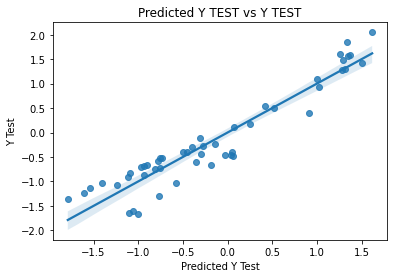

In [22]:
# add predicted y to TEST set as a column
x_test["Predicted Y Test"] = y_hat_predicted_test

# add y_train to TEST set as a column
x_test["Y Test"] = y_test

#plot predicted y vs actual y for train set with regression line, for y use "Sales" column from y_train
sns.regplot(x="Predicted Y Test", y=x_test["Y Test"], data=x_test)
plt.title("Predicted Y TEST vs Y TEST")
plt.show()

# remove "Y Test" and "Predicted Y Test" columns from x_test
x_test = x_test.drop(["Y Test", "Predicted Y Test"], axis=1)

#### Evaluate Performance on TEST set using MSE and R2

In [23]:
# Evaluate performance using MSE and R2 for TEST set
# mean_squared_error and r2_score from sklearn 
MSE_test = mean_squared_error(y_test, y_hat_predicted_test)
R2_test = r2_score(y_test, y_hat_predicted_test)

print("MSE for TEST set:", MSE_test)
print("R2 for TEST set:", R2_test)

# verify R2 using ols from statsmodels
ols = LinearRegression()
ols.fit(x_test, y_test)
print("R2 OLS for TEST set:", ols.score(x_test, y_test))


MSE for TEST set: 0.0993975927654539
R2 for TEST set: 0.9004586403459471
R2 OLS for TEST set: 0.9004587765307268


#### R2 score and OLS R2 score are the same (0.9004). 

#### The higher the R2 score (closer to 1), the better the model fits the data. On the other hand, the lower the MSE (closer to 0), the better the model fits the data.

#### For the TEST set, with an MSE of 0.09, this means that the model is 91% accurate in predicting the quantitative response y on the TEST set. And with an R2 score of 0.90, this means that the model is 90% accurate in predicting the quantitative response y on the TEST set.

## 8. Reverting data back into original form
<li>We simply have to equate the previous equation:
<p><i>x_scaled * std(x_j) + mean(x_j) = x_j</i>

In [24]:
# compute mean and std of x data columns TV, Radio, Newspaper
x_mean = data.iloc[:, 0:3].mean()
x_std = data.iloc[:, 0:3].std()

# compute mean and std of y data column Sales
y_mean = data.iloc[:, 3].mean()
y_std = data.iloc[:, 3].std()

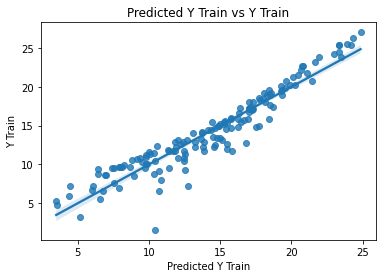

In [25]:
# Revert standardization of TRAIN data

# copy x_train and y_train to x_train_revert and y_train_revert
x_train_revert = x_train.copy()
y_train_revert = y_train.copy()

# reverse standardization of train data, for all predictors
x_train_revert["TV"] = (x_train_revert["TV"] * x_std[0]) + x_mean[0]
x_train_revert["Radio"] = (x_train_revert["Radio"] * x_std[1]) + x_mean[1]
x_train_revert["Newspaper"] = (x_train_revert["Newspaper"] * x_std[2]) + x_mean[2]

# reverse standardization of train data, for the y/response variable
y_train_revert = (y_train_revert * y_std) + y_mean

# reverse standardization of y_hat_predicted_train
y_hat_predicted_train = (y_hat_predicted_train * y_std) + y_mean

# add y_train and y_hat_predicted_train to x_train as columns
x_train_revert["Y Train"] = y_train_revert
x_train_revert["Predicted Y Train"] = y_hat_predicted_train

#plot predicted y vs actual y for train set with regression line
sns.regplot(x="Predicted Y Train", y=x_train_revert["Y Train"], data=x_train_revert)
plt.title("Predicted Y Train vs Y Train")
plt.show()


##### If you check the plot at #6, you can see that both plots for the standardized and non-standardized data look similar, with the difference being that the non-standardized data has a larger range of values in the y and x axis.

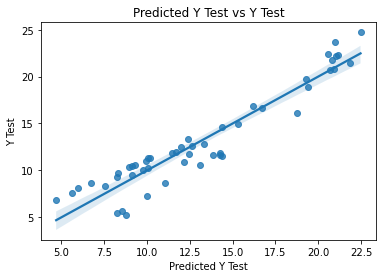

In [26]:
# Revert standardization of TEST data

# copy x_test and y_test to x_test_revert and y_test_revert
x_test_revert = x_test.copy()
y_test_revert = y_test.copy()

# reverse standardization of test data, for all predictors
x_test_revert["TV"] = (x_test_revert["TV"] * x_std[0]) + x_mean[0]
x_test_revert["Radio"] = (x_test_revert["Radio"] * x_std[1]) + x_mean[1]
x_test_revert["Newspaper"] = (x_test_revert["Newspaper"] * x_std[2]) + x_mean[2]

# reverse standardization of test data, for the y/response variable
y_test_revert = (y_test_revert * y_std) + y_mean

# reverse standardization of y_hat_predicted_test
y_hat_predicted_test = (y_hat_predicted_test * y_std) + y_mean

# add y_test and y_hat_predicted_test to x_test as columns
x_test_revert["Y Test"] = y_test_revert
x_test_revert["Predicted Y Test"] = y_hat_predicted_test

#plot predicted y vs actual y for test set with regression line
sns.regplot(x="Predicted Y Test", y=x_test_revert["Y Test"], data=x_test_revert)
plt.title("Predicted Y Test vs Y Test")
plt.show()

##### The same goes with this plot, compared to the plot at #7. With the same difference where the non-standardized data has a larger range of values in the y and x axis.

## 9. Observe the cost results and analyse

In [27]:
# Observe the cost results using compute_cost function for TEST set
cost_results_test = compute_cost(y_hat_predicted_test, y_test)
print("Cost results for TEST set:", cost_results_test)

Cost results for TEST set: 96.96163038892153


#### Recall that the compute_cost function returns a scalar value that tells us how accurate the model is.

#### A Cost of 1.353 (J_theta = 1.353) means that the cost is relatively high, and that the model is not very accurate in predicting the quantitative response y on the TRAIN set.

In [28]:
# Observe the cost results using compute_cost function for TRAIN set
cost_results_train = compute_cost(y_hat_predicted_train, y_train)
print("Cost results for TRAIN set:", cost_results_train)

Cost results for TRAIN set: 109.48151685831986


#### The TRAIN set has a Cost of 1.353 (J_theta = 1.353) which means that the cost is relatively high, and that the model is not very accurate in predicting the quantitative response y on the TRAIN set.

# === END OF CODE SOLUTION ===

#### THE FOLLOWING ARE "SCRATCH" CODES USED FOR THE HW3 QUESTIONS

#### Note: Assume initial weights are 0s

In [29]:
# call the initial_weights_zero function to get initial weights
init_w = initialize_weights_zeros()
print("Initial weights:", init_w)

Initial weights: [0. 0. 0. 0.]


##### 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

<p><li>h_theta(x) = theta_0 + theta_1*TV + theta_2*Radio + theta_3*Newspaper<p>

##### What are your interpretations regarding the formed linear model?

#### 1.1 TRAIN SET

In [30]:
# For TRAIN Set
# call the weights_train variable from #6, and get the final weights
print("Final weights for TRAIN set:\n", weights_train[-1]) #[-1] is the last set of weights

# For TEST Set
# call the weights_test variable from #7, and get the final weights
print("Final weights for TEST set:\n", weights_test[-1]) #[-1] is the last set of weights

# For ENTIRE Set (x and y)
weights_all = grad_descent(init_w, x, y, alpha, iterations)[0]
print("Final weights for ENTIRE set:\n", weights_all[-1]) #[-1] is the last set of weights

# Note: all values are standardized

Final weights for TRAIN set:
 [-0.0059112722535643635, 0.7476082427363376, 0.5442247902169065, 0.01139398883039353]
Final weights for TEST set:
 [0.023479411524492455, 0.7812565897724794, 0.5050373947335791, -0.039271495434334225]
Final weights for ENTIRE set:
 [-5.527245328096342e-17, 0.7530307236867304, 0.5360686764319861, -0.003908323196123136]


#### 2. Plot Y and Y predicted (already plotted in #6 and #7)

#### 3. What happens to error, r2, and cost as iterations increase
#### 4. Changing alpha

#### 5. Learning rate vs Iterations

In [31]:
# create a list of MSE
mse_list = []

# create a list of r2
r2_list = []

# create a list of cost
cost_list = []

# compute the cost values for each iteration
cost_val = grad_descent(init_w, x_train, y_train, alpha, iterations)[1]

# compute MSE for each iteration
for i in range(0, len(weights_train)):
    y_hat_predicted_train = predict(weights_train[i], x_train)
    mse_list.append(mean_squared_error(y_train, y_hat_predicted_train))

# compute R2 for each iteration
for i in range(0, len(weights_train)):
    y_hat_predicted_train = predict(weights_train[i], x_train)
    r2_list.append(r2_score(y_train, y_hat_predicted_train))

# create a dataframe for cost, mse, and r2
iteration_df = pd.DataFrame({"Cost": cost_val, "MSE/Error": mse_list, "R2": r2_list})
iteration_df


,Cost,MSE/Error,R2
0,0.495831,0.972335,0.016576
1,0.486167,0.953443,0.035683
2,0.476722,0.934979,0.054358
3,0.467489,0.916931,0.072611
4,0.458466,0.899291,0.090453
...,...,...,...
995,0.051095,0.102190,0.896644
996,0.051095,0.102190,0.896644
997,0.051095,0.102190,0.896644
998,0.051095,0.102190,0.896644


In [32]:
# approximate for the optimal number of iterations given alpha = 0.01
for i in range(iterations):
    # round the Cost to 4 decimal places
    # iteration_df["Cost"],4).min() is the minimum Cost rounded to 4 decimal places,
    # this is where the elbow is, and when the Cost value reduction plateaus
    if round(iteration_df["Cost"][i],4) == round(iteration_df["Cost"],4).min():
        print("Total iterations:", iterations)
        # print("Optimal number of iterations for alpha = 0.01:", i)
        optimal_iterations = i
        print("Cost plateau:", round(iteration_df["Cost"][i],4))
        break

print("alpha = 0.01, optimal number of iterations:", optimal_iterations)

Total iterations: 1000
Cost plateau: 0.0511
alpha = 0.01, optimal number of iterations: 547


In [33]:
# visualize the cost values per iteration vs the optimal number of iterations, at different alpha values
# use the following alpha: 0.1, 0.01, 0.001, 0.0001, 0.2

# create a list of alpha values
alpha_list = [0.1, 0.01, 0.001, 0.0001, 0.2]


# create a list of cost values for each alpha
cost_list_per_alpha = []
for i in range(len(alpha_list)):
    cost_list_per_alpha.append(grad_descent(init_w, x_train, y_train, alpha_list[i], optimal_iterations)[1])

# save each cost list for each alpha value as a column in a new dataframe
per_alpha_df = pd.DataFrame({"alpha = 0.1": cost_list_per_alpha[0], "alpha = 0.01": cost_list_per_alpha[1], "alpha = 0.001": cost_list_per_alpha[2], "alpha = 0.0001": cost_list_per_alpha[3], "alpha = 0.2": cost_list_per_alpha[4]})

per_alpha_df

,alpha = 0.1,alpha = 0.01,alpha = 0.001,alpha = 0.0001,alpha = 0.2
0,0.495831,0.495831,0.495831,0.495831,0.495831
1,0.404165,0.486167,0.494860,0.495734,0.323553
2,0.332089,0.476722,0.493891,0.495637,0.220191
3,0.275293,0.467489,0.492924,0.495540,0.157447
4,0.230438,0.458466,0.491959,0.495443,0.118895
...,...,...,...,...,...
542,0.051095,0.051153,0.191151,0.446264,0.051095
543,0.051095,0.051152,0.190861,0.446178,0.051095
544,0.051095,0.051152,0.190571,0.446092,0.051095
545,0.051095,0.051151,0.190282,0.446006,0.051095


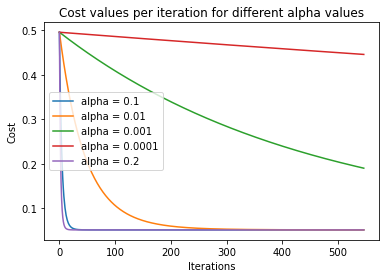

In [34]:
# plot all the cost values per iteration for each alpha value in a single plot

for i in range(len(alpha_list)):
    plt.plot(per_alpha_df.iloc[:,i], label = "alpha = " + str(alpha_list[i]))

plt.title("Cost values per iteration for different alpha values")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

#### 6. Compare results with OLS

##### Answered in #6 of the code solution

#### === END OF QUESTIONS "SCRATCH" CODES ===